# MLOps for RSEs - Data Preparation and Exploration Examples


key principles / tasks supported by RSEs
* reusable components
* running at scale
* interactive data exploration
* FAIR / ARCO data


## Key elements of data preparation and exploration

load the data, get the data from zenodo if required.https://zenodo.org/record/6966937
https://doi.org/10.5281/zenodo.6966937

Also make available through azure??


### Key Tools

### Key RSE tasks and responsibilitiues

## Example 1 - Rotors Dataset

data clean and exploration

scikit learn pipeline?

holoviz data display

In [1]:
import pathlib
import os
import functools

In [2]:
import pandas

In [3]:
import matplotlib
import matplotlib.pyplot

In [4]:
import dask
import dask.dataframe
import dask.distributed

In [5]:
try:
    rse_root_data_dir = pathlib.Path(os.environ['RSE22_ROOT_DATA_DIR'])
    print('reading from environment variable')
except KeyError as ke1:
    rse_root_data_dir = pathlib.Path(os.environ['HOME'])  / 'data' / 'ukrse2022'
    print('using default path')
rse_root_data_dir

using default path


PosixPath('/Users/stephen.haddad/data/ukrse2022')

In [6]:
rotors_fname = '2021_met_office_aviation_rotors.csv'
rotors_path = rse_root_data_dir / rotors_fname
print(rotors_path.is_file())
rotors_path

True


PosixPath('/Users/stephen.haddad/data/ukrse2022/2021_met_office_aviation_rotors.csv')

### Set up the cluster

In [7]:
local_cluster = dask.distributed.LocalCluster(n_workers=4)
local_cluster

2022-08-10 18:32:00,920 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/w0/2x361bn95wj7lfgl33vksx1w0000gn/T/dask-worker-space/worker-2je6zeya', purging
2022-08-10 18:32:00,920 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/w0/2x361bn95wj7lfgl33vksx1w0000gn/T/dask-worker-space/worker-n6zhwq4b', purging
2022-08-10 18:32:00,921 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/w0/2x361bn95wj7lfgl33vksx1w0000gn/T/dask-worker-space/worker-4sy2kuxr', purging
2022-08-10 18:32:00,921 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/w0/2x361bn95wj7lfgl33vksx1w0000gn/T/dask-worker-space/worker-l2mv6d_6', purging


LocalCluster(4aad14b3, 'tcp://127.0.0.1:59123', workers=4, threads=8, memory=16.00 GiB)

In [8]:
dask_client = dask.distributed.Client(local_cluster)
dask_client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:59123,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:59145,Total threads: 2
Dashboard: http://127.0.0.1:59148/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:59129,


### Prepare and execute data reading tasks

In [ ]:
rotors_df = dask.dataframe.read_csv(rotors_path)
rotors_df

In [ ]:
rotors_df.columns

In [ ]:
rotors_df  = rotors_df [(rotors_df ['wind_speed_obs'] >= 0.0) &
                            (rotors_df ['air_temp_obs'] >= 0.0) &
                            (rotors_df ['wind_direction_obs'] >= 0.0) &
                            (rotors_df ['dewpoint_obs'] >= 0.0) 
                           ]

In [ ]:
rotors_df.dask

In [ ]:
rotors_df ['DTG'] = dask.dataframe.to_datetime(rotors_df['DTG'])

In [ ]:
rotors_df  = rotors_df .drop_duplicates(subset=['DTG'])

In [ ]:
rotors_df  = rotors_df [~rotors_df['DTG'].isnull()]

In [ ]:
rotors_df_delayed = rotors_df
rotors_df_delayed

In [ ]:
no_rotors_df = rotors_df[rotors_df['rotors'] ==False]
rotors_present_df = rotors_df[rotors_df['rotors'] == True]

In [ ]:
no_rotors_df.shape, rotors_df.shape

To get the data, we have to execute the task graph on the cluster. We should now see something happen on the dask dashbaord.

In [ ]:
no_rotors_df = no_rotors_df.compute()
rotors_present_df = rotors_present_df.compute()

### Create an interactive dashboard for data exploration
Facilitates data reuse

In [24]:
import panel
panel.extension()

In [ ]:
rotors_df.columns

In [ ]:
model_vars_dict = {
    'Temperature': 'air_temp',
    'Specific Humidity': 'sh',
    'Wind Direction': 'winddir' ,
    'Wind Speed': 'windspd' ,
           }

In [ ]:
obs_dict = {
    'Temperature': 'air_temp_obs',
    'Dew Point Temperature': 'dewpoint_obs',
    'Wind Direction': 'wind_direction_obs' ,
    'Wind Speed': 'wind_speed_obs' ,
}

In [ ]:
panel.widgets.Select(options=obs_dict)

In [ ]:
def do_histogram():
    passa

In [ ]:
def do_height

In [ ]:
def stats_dashboard(select_df, variable)

In [ ]:
# load data in using ray datasets csv loader

In [ ]:
# define data cleaning as a series of small function which return a dataset

In [ ]:
# call map_functions on the dataset to clean the data


In [ ]:
# do some holoviz plots

In [ ]:
# create a panel dashboard (maybe using matplotlib plus holoviews/geovierws?

## Example 2 - ERA5 Reanalysis Dataset

processing data at scale
cloud optimised dataset
intake catalog of data


In [9]:
import iris
import iris.coord_categorisation
import iris.quickplot

In [10]:
import cartopy
import cartopy.crs

In [11]:
try:
    era5_data_dir = pathlib.Path(os.environ['RSE22_ERA5_DATA_DIR'])
    print('reading from environment variable')
except KeyError as ke1:
    era5_data_dir = pathlib.Path(os.environ['HOME'])  / 'data' / 'era5'
    print('using default path')
era5_data_dir

using default path


PosixPath('/Users/stephen.haddad/data/era5')

In [12]:
era5_global_paths = sorted([p1 for p1 in era5_data_dir.iterdir() if '.nc' in str(p1) and 'air_pressure' in str(p1)])

In [13]:
uk_na_bounds = {'latitude': (40,65), 'longitude': (-10,10)}

In [14]:
do_global_extract = False

In [15]:
if do_global_extract:
    print('do global_extract')
    era5_global_cubeList = iris.load(map(str, era5_global_paths))
    iris.util.equalise_attributes(era5_global_cubeList)
    mslp_era5_cube = iris.cube.CubeList.concatenate_cube(era5_global_cubeList)
    mslp_era5_uk_cube = mslp_era5_cube.intersection(latitude=uk_na_bounds['latitude'], 
                                                longitude=uk_na_bounds['longitude'])
else:
    print('loading cached data')
    mslp_era5_uk_cube = iris.load_cube(str(era5_data_dir / 'era5_mslp_UK_2017_2020.nc'))

loading cached data


In [16]:
mslp_era5_uk_cube

Air Pressure At Mean Sea Level (Pa),time,latitude,longitude
Shape,35064,101,81
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Attributes,,,Conventions CF-1.7institution ECMWFnameCDM Mean_sea_level_pressure_surfacenameECMWF Mean sea level pressureproduct_type analysisshortNameECMWF mslsource Reanalysis


In [17]:
print(type(mslp_era5_uk_cube.core_data()))
mslp_era5_uk_cube.core_data()

<class 'dask.array.core.Array'>


dask.array<array, shape=(35064, 101, 81), dtype=float32, chunksize=(3896, 101, 81), chunktype=numpy.ndarray>

In [18]:
iris.iris.coord_categorisation.add_season_number(mslp_era5_uk_cube,'time')


In [19]:
mslp_uk_seasonal_mean = mslp_era5_uk_cube.aggregated_by(['season_number'],iris.analysis.MEAN)
mslp_uk_seasonal_mean

<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (-- : 4; latitude: 101; longitude: 81)>

In [20]:
mslp_uk_seasonal_mean.core_data()

dask.array<stack, shape=(4, 101, 81), dtype=float32, chunksize=(1, 101, 81), chunktype=numpy.ndarray>

In [34]:
era5_flat_deseasoned = era5_flat_deseasoned.compute()
era5_flat_deseasoned

masked_array(
  data=[[2976.2266 , 2933.2734 , 2890.2344 , ..., 1013.2578 , 1018.2578 ,
         1010.15625],
        [3038.539  , 2997.586  , 2956.5469 , ...,  992.8203 , 1003.5703 ,
          988.71875],
        [3147.2266 , 3109.5234 , 3071.9844 , ..., 1002.2578 , 1012.2578 ,
          994.40625],
        ...,
        [1552.1953 , 1567.8672 , 1583.2266 , ...,  517.4922 ,  516.6172 ,
          529.7969 ],
        [1499.0078 , 1519.9297 , 1541.0391 , ...,  508.5547 ,  504.4297 ,
          522.8594 ],
        [1417.7578 , 1447.4297 , 1477.2891 , ...,  470.8047 ,  462.6797 ,
          480.85938]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

2022-08-10 18:36:48,888 - bokeh.core.property.validation - ERROR - 'start'
Traceback (most recent call last):
  File "/Users/stephen.haddad/opt/anaconda3/envs/ukrse2022_mlops_data_prep/lib/python3.8/site-packages/distributed/utils.py", line 784, in wrapper
    return func(*args, **kwargs)
  File "/Users/stephen.haddad/opt/anaconda3/envs/ukrse2022_mlops_data_prep/lib/python3.8/site-packages/distributed/dashboard/components/shared.py", line 295, in update
    ts = metadata["keys"][self.key]
KeyError: 'start'
2022-08-10 18:36:48,891 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x7f8bc20baca0>>, <Task finished name='Task-1748' coro=<ServerSession.with_document_locked() done, defined at /Users/stephen.haddad/opt/anaconda3/envs/ukrse2022_mlops_data_prep/lib/python3.8/site-packages/bokeh/server/session.py:78> exception=KeyError('start')>)
Traceback (most recent call last):
  Fil

In [21]:
uk_season_dict = {
    'NH Winter': 0,
    'NH Spring': 1,
    'NH Summer': 2,
    'NH Autumun': 3,
}

In [29]:
def plot_seasonal_mean(plotting_cube, season):
    print(f'season {season}')
    fig1 = matplotlib.figure.Figure()
    fig1.clf()
    ax1 = fig1.add_subplot(1,1,1,projection=cartopy.crs.PlateCarree())
    _ = iris.quickplot.contourf(plotting_cube[season],axes=ax1)
    ax1.coastlines()    
    return fig1

In [25]:
season_select = panel.widgets.Select(options=uk_season_dict, 
                                     value=2,
                                     name='season'
                                     )

In [30]:
season_plotter = panel.bind(
    functools.partial(plot_seasonal_mean, mslp_uk_seasonal_mean),
    season=season_select,
)


season 2


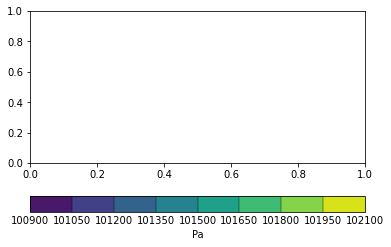

In [31]:
seasons_dash = panel.Column(season_select, season_plotter)

Column
    [0] Select(name='season', options={'NH Winter': 0, ...}, value=2)
    [1] ParamFunction(function)
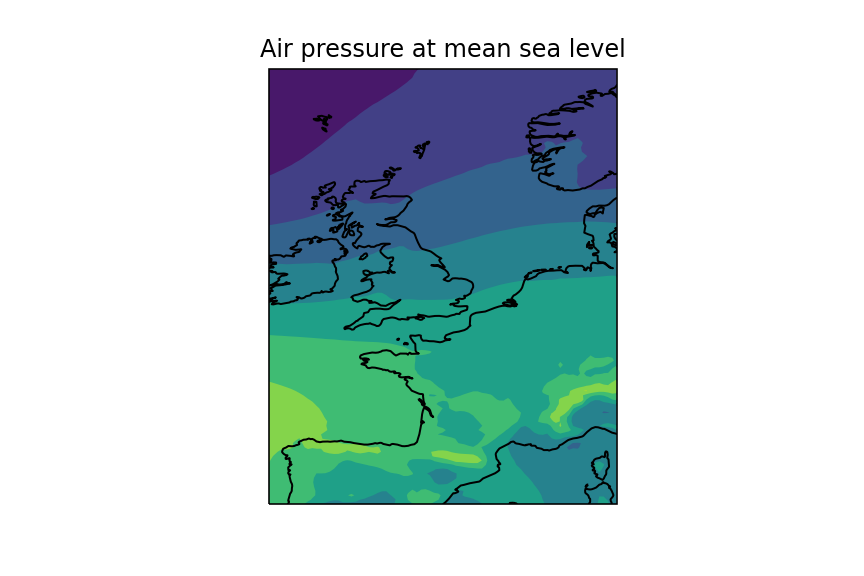

In [32]:
seasons_dash.servable()

In [ ]:
fig1 = matplotlib.pyplot.figure(figsize=(9,16))
for ix1 in range(mslp_uk_seasonal_mean.shape[0]):
    ax1 = fig1.add_subplot(1,4,ix1+1,projection=cartopy.crs.PlateCarree())
    iris.quickplot.contourf(mslp_uk_seasonal_mean[ix1],axes=ax1)
    ax1.coastlines()

In [ ]:
dask.array.concatenate

In [33]:
era5_flat_deseasoned = dask.array.concatenate(
    [(mslp_era5_uk_cube.extract(iris.Constraint(season_number=sn1)).core_data() - mslp_uk_seasonal_mean[sn1].core_data()).reshape(
    (-1, mslp_era5_uk_cube.shape[1] * mslp_era5_uk_cube.shape[2])) for sn1 in range(4)],
    axis=0
)
era5_flat_deseasoned

dask.array<concatenate, shape=(35064, 8181), dtype=float32, chunksize=(2208, 8181), chunktype=numpy.ndarray>

### Example 3 - Creating a catalog with Intake

In [35]:
import intake

In [37]:
rotors_catalog = intake.open_catalog(rse_root_data_dir / 'rotors_catalog.yml')
rotors_catalog 

rotors_catalog:
  args:
    path: /Users/stephen.haddad/data/ukrse2022/rotors_catalog.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [38]:
list(rotors_catalog)

['rotors']

In [41]:
rotors_catalog['rotors'].read()

,DTG,air_temp_obs,dewpoint_obs,wind_direction_obs,wind_speed_obs,wind_gust_obs,air_temp_1,air_temp_2,air_temp_3,air_temp_4,...,windspd_18,winddir_19,windspd_19,winddir_20,windspd_20,winddir_21,windspd_21,winddir_22,windspd_22,rotors
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,01/01/2015 00:00,283.9,280.7,110.0,4.1,-9999999.0,284.000,283.625,283.250,282.625,...,5.8,341.0,6.0,334.0,6.1,330.0,6.0,329.0,5.8,0.0
2,01/01/2015 03:00,280.7,279.7,90.0,7.7,-9999999.0,281.500,281.250,280.750,280.250,...,6.8,344.0,5.3,348.0,3.8,360.0,3.2,12.0,3.5,0.0
3,01/01/2015 06:00,279.8,278.1,100.0,7.7,-9999999.0,279.875,279.625,279.125,278.625,...,6.0,345.0,5.5,358.0,5.0,10.0,4.2,38.0,4.0,0.0
4,01/01/2015 09:00,279.9,277.0,120.0,7.2,-9999999.0,279.625,279.250,278.875,278.250,...,3.1,338.0,3.5,354.0,3.9,9.0,4.4,22.0,4.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20101,31/12/2020 06:00,276.7,275.5,270.0,3.6,-9999999.0,277.875,277.750,277.625,277.500,...,12.1,223.0,11.8,221.0,11.4,219.0,11.3,215.0,11.4,0.0
20102,31/12/2020 09:00,277.9,276.9,270.0,3.1,-9999999.0,277.875,277.625,277.875,277.875,...,10.2,230.0,10.8,230.0,11.6,227.0,12.3,222.0,12.0,0.0
20103,31/12/2020 12:00,283.5,277.1,220.0,3.6,-9999999.0,281.125,280.625,280.125,279.625,...,10.3,218.0,11.9,221.0,12.8,222.0,11.9,225.0,10.6,0.0
20104,31/12/2020 15:00,286.1,276.9,250.0,3.6,-9999999.0,284.625,284.125,283.625,283.000,...,9.4,218.0,8.6,212.0,8.3,218.0,8.7,226.0,10.1,0.0


this could be on the cloud

this be involve some exotic data transformations which are hidden from the user.

In [50]:
# this could be pointing at cloud storage
import fsspec

sources:
  csv:
    args:
      urlpath:
      - /Users/stephen.haddad/data/ukrse2022/2021_met_office_aviation_rotors.csv
    description: ''
    driver: intake.source.csv.CSVSource
    metadata: {}



In [59]:
new_cat_fname = 'my_catalog.yml'

In [64]:
intake.open_csv(fsspec.open_local(rotors_path)).read()

,DTG,air_temp_obs,dewpoint_obs,wind_direction_obs,wind_speed_obs,wind_gust_obs,air_temp_1,air_temp_2,air_temp_3,air_temp_4,...,windspd_18,winddir_19,windspd_19,winddir_20,windspd_20,winddir_21,windspd_21,winddir_22,windspd_22,rotors
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,01/01/2015 00:00,283.9,280.7,110.0,4.1,-9999999.0,284.000,283.625,283.250,282.625,...,5.8,341.0,6.0,334.0,6.1,330.0,6.0,329.0,5.8,0.0
2,01/01/2015 03:00,280.7,279.7,90.0,7.7,-9999999.0,281.500,281.250,280.750,280.250,...,6.8,344.0,5.3,348.0,3.8,360.0,3.2,12.0,3.5,0.0
3,01/01/2015 06:00,279.8,278.1,100.0,7.7,-9999999.0,279.875,279.625,279.125,278.625,...,6.0,345.0,5.5,358.0,5.0,10.0,4.2,38.0,4.0,0.0
4,01/01/2015 09:00,279.9,277.0,120.0,7.2,-9999999.0,279.625,279.250,278.875,278.250,...,3.1,338.0,3.5,354.0,3.9,9.0,4.4,22.0,4.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20101,31/12/2020 06:00,276.7,275.5,270.0,3.6,-9999999.0,277.875,277.750,277.625,277.500,...,12.1,223.0,11.8,221.0,11.4,219.0,11.3,215.0,11.4,0.0
20102,31/12/2020 09:00,277.9,276.9,270.0,3.1,-9999999.0,277.875,277.625,277.875,277.875,...,10.2,230.0,10.8,230.0,11.6,227.0,12.3,222.0,12.0,0.0
20103,31/12/2020 12:00,283.5,277.1,220.0,3.6,-9999999.0,281.125,280.625,280.125,279.625,...,10.3,218.0,11.9,221.0,12.8,222.0,11.9,225.0,10.6,0.0
20104,31/12/2020 15:00,286.1,276.9,250.0,3.6,-9999999.0,284.625,284.125,283.625,283.000,...,9.4,218.0,8.6,212.0,8.3,218.0,8.7,226.0,10.1,0.0


In [74]:
cat1 = intake.catalog.()
cat1

null:
  args: {}
  description: ''
  driver: intake.catalog.base.Catalog
  metadata: {}


In [75]:
cat1.name = 'rotors'

In [70]:
intake.source.csv.CSVSource(fsspec.open_local(rotors_path)).yaml()

"sources:\n  csv:\n    args:\n      urlpath:\n      - /Users/stephen.haddad/data/ukrse2022/2021_met_office_aviation_rotors.csv\n    description: ''\n    driver: intake.source.csv.CSVSource\n    metadata: {}\n"

In [77]:
with open(new_cat_fname , 'w') as cat_out:
    constructed_catalog = intake.open_csv(fsspec.open_local(rotors_path))
    constructed_catalog.description = '''Tabular dataset with observed and simulated weather data, 
    intended for use training a machine learning model predicting turbulent wind gust events.'''
    catalog_txt = constructed_catalog.yaml()
    print(catalog_txt)
    cat_out.write(catalog_txt)


sources:
  csv:
    args:
      urlpath:
      - /Users/stephen.haddad/data/ukrse2022/2021_met_office_aviation_rotors.csv
    description: "Tabular dataset with observed and simulated weather data, \n   \
      \ intended for use training a machine learning model predicting turbulent wind\
      \ gust events."
    driver: intake.source.csv.CSVSource
    metadata: {}



In [82]:
new_catalog = intake.open_catalog(new_cat_fname)
new_catalog

my_catalog:
  args:
    path: my_catalog.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [83]:
new_catalog['csv'].read()

,DTG,air_temp_obs,dewpoint_obs,wind_direction_obs,wind_speed_obs,wind_gust_obs,air_temp_1,air_temp_2,air_temp_3,air_temp_4,...,windspd_18,winddir_19,windspd_19,winddir_20,windspd_20,winddir_21,windspd_21,winddir_22,windspd_22,rotors
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,01/01/2015 00:00,283.9,280.7,110.0,4.1,-9999999.0,284.000,283.625,283.250,282.625,...,5.8,341.0,6.0,334.0,6.1,330.0,6.0,329.0,5.8,0.0
2,01/01/2015 03:00,280.7,279.7,90.0,7.7,-9999999.0,281.500,281.250,280.750,280.250,...,6.8,344.0,5.3,348.0,3.8,360.0,3.2,12.0,3.5,0.0
3,01/01/2015 06:00,279.8,278.1,100.0,7.7,-9999999.0,279.875,279.625,279.125,278.625,...,6.0,345.0,5.5,358.0,5.0,10.0,4.2,38.0,4.0,0.0
4,01/01/2015 09:00,279.9,277.0,120.0,7.2,-9999999.0,279.625,279.250,278.875,278.250,...,3.1,338.0,3.5,354.0,3.9,9.0,4.4,22.0,4.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20101,31/12/2020 06:00,276.7,275.5,270.0,3.6,-9999999.0,277.875,277.750,277.625,277.500,...,12.1,223.0,11.8,221.0,11.4,219.0,11.3,215.0,11.4,0.0
20102,31/12/2020 09:00,277.9,276.9,270.0,3.1,-9999999.0,277.875,277.625,277.875,277.875,...,10.2,230.0,10.8,230.0,11.6,227.0,12.3,222.0,12.0,0.0
20103,31/12/2020 12:00,283.5,277.1,220.0,3.6,-9999999.0,281.125,280.625,280.125,279.625,...,10.3,218.0,11.9,221.0,12.8,222.0,11.9,225.0,10.6,0.0
20104,31/12/2020 15:00,286.1,276.9,250.0,3.6,-9999999.0,284.625,284.125,283.625,283.000,...,9.4,218.0,8.6,212.0,8.3,218.0,8.7,226.0,10.1,0.0


* https://intake.readthedocs.io/en/latest/quickstart.html
* http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/intake.html 
* https://medium.com/informatics-lab/archive-how-to-build-an-intake-catalog-c49182297572

### Next Steps and further reading

### References

* [Ray]()
* [Holoviz](https://holoviz.org/)